In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline

In [2]:
def batch_crystalisation(frac_factor, initial_composition, liquid_fraction):
    """
    For a vector of liquid fractions, a fractionation factor, and an initial composition,
    calculate vectors of the composition of the residual melt and cumulate assuming a batch 
    process
    """
    # This is based on cells K-N of Tim's spreadsheet
    # Liquid_fraction should be a numpy array, returned values are arrays of the same shape
    residual_liquid = (initial_composition - frac_factor * (1.0 - liquid_fraction)) - initial_composition
    cumulate = (initial_composition - frac_factor * (1.0 - liquid_fraction)) + frac_factor - initial_composition
    return residual_liquid, cumulate


def fractional_crystalisation(frac_factor, initial_composition, liquid_fraction):
    """
    For a vector of liquid fractions, a fractionation factor, and an initial composition,
    calculate vectors of the composition of the residual melt and cumulate assuming 
    a fractional process
    """
    # This is based on cells O-R of Tim's spreadsheet
    # Liquid_fraction should be a numpy array, returned values are arrays of the same shape 
    residual_liquid_little_d = liquid_fraction**(np.expm1(frac_factor/1000.0)) * (
        1000.0+initial_composition) - 1000.0
    residual_liquid = residual_liquid_little_d - initial_composition 
    cumulate = ((initial_composition - (liquid_fraction*residual_liquid_little_d)
               )/(1.0-liquid_fraction)) - initial_composition
    return residual_liquid, cumulate
                                        

In [3]:
def calculate_fractionation(rpf_bdg, rpf_per, rpf_melt, liquid_fraction):
    # Alphas (1000 ln alpha)
    al_bdg_melt = rpf_bdg - rpf_melt
    al_per_melt = rpf_per - rpf_melt

    # Composition
    mass_frac_bdg = 0.9
    mass_frac_per = 1.0 - mass_frac_bdg

    mass_mg_in_bdg = 24/(24+28+16*3)
    mass_mg_in_per = 24/(24+16) 


    mg_frc_bdg = (mass_frac_bdg * mass_mg_in_bdg) / (mass_frac_bdg * mass_mg_in_bdg + mass_frac_per * mass_mg_in_per)
    mg_frac_per = (mass_frac_per * mass_mg_in_per) / (mass_frac_bdg * mass_mg_in_bdg + mass_frac_per * mass_mg_in_per)

    al_bulk_melt = al_bdg_melt * mg_frc_bdg + al_per_melt * mg_frac_per

    #print(f"Values for 1000.ln(alpha)")
    #print(f"    {al_bdg_melt=}")
    #print(f"    {al_per_melt=}")
    #print(f"    {al_bulk_melt=}")



    # Assume only Bdm forms

    # H6
    initial_mantle_delta = -0.25

    residual_liquid_Delta_batch_bdm, cumulate_Delta_batch_bdm = batch_crystalisation(
        al_bdg_melt, initial_mantle_delta, liquid_fraction)

    #print(f"{residual_liquid_Delta_batch_bdm=}")
    #print(f"{cumulate_Delta_batch_bdm=}")

    residual_liquid_Delta_frac_bdm, cumulate_Delta_frac_bdm = fractional_crystalisation(
        al_bdg_melt, initial_mantle_delta, liquid_fraction)

    #print(f"{residual_liquid_Delta_frac_bdm=}")
    #print(f"{cumulate_Delta_frac_bdm=}")

    ###

    residual_liquid_Delta_batch_bulk, cumulate_Delta_batch_bulk = batch_crystalisation(
        al_bulk_melt, initial_mantle_delta, liquid_fraction)

    #print(f"{residual_liquid_Delta_batch_bulk=}")
    #print(f"{cumulate_Delta_batch_bulk=}")

    residual_liquid_Delta_frac_bulk, cumulate_Delta_frac_bulk = fractional_crystalisation(
        al_bulk_melt, initial_mantle_delta, liquid_fraction)

    #print(f"{residual_liquid_Delta_frac_bulk=}")
    #print(f"{cumulate_Delta_frac_bulk=}") 
    
    return residual_liquid_Delta_batch_bdm, cumulate_Delta_batch_bdm, \
           residual_liquid_Delta_frac_bdm, cumulate_Delta_frac_bdm, \
           residual_liquid_Delta_batch_bulk, cumulate_Delta_batch_bulk, \
           residual_liquid_Delta_frac_bulk, cumulate_Delta_frac_bulk

In [4]:
print("1000 km")
# Reduced partition functions (1000 ln beta) from my table at 1000 km
rpf_fo = 0.338
rpf_bdg = 0.278
rpf_per = 0.332
rpf_melt = 0.653

liquid_fraction = np.array([0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 
                            0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01])
liquid_fraction = np.linspace(0.01, 0.99, 10000)


residual_liquid_Delta_batch_bdm_1000, cumulate_Delta_batch_bdm_1000, \
residual_liquid_Delta_frac_bam_1000, cumulate_Delta_frac_bdm_1000, \
residual_liquid_Delta_batch_bulk_1000, cumulate_Delta_batch_bulk_1000, \
residual_liquid_Delta_frac_bulk_1000, cumulate_Delta_frac_bulk_1000 = calculate_fractionation(
    rpf_bdg, rpf_per, rpf_melt, liquid_fraction)

print("2500 km")
# Reduced partition functions (1000 ln beta) from my table at 2500 km
rpf_fo = 0.250
rpf_bdg = 0.189
rpf_per = 0.203
rpf_melt = 0.442

residual_liquid_Delta_batch_bdm_2500, cumulate_Delta_batch_bdm_2500, \
residual_liquid_Delta_frac_bam_2500, cumulate_Delta_frac_bdm_2500, \
residual_liquid_Delta_batch_bulk_2500, cumulate_Delta_batch_bulk_2500, \
residual_liquid_Delta_frac_bulk_2500, cumulate_Delta_frac_bulk_2500 = calculate_fractionation(
    rpf_bdg, rpf_per, rpf_melt, liquid_fraction)



1000 km
2500 km


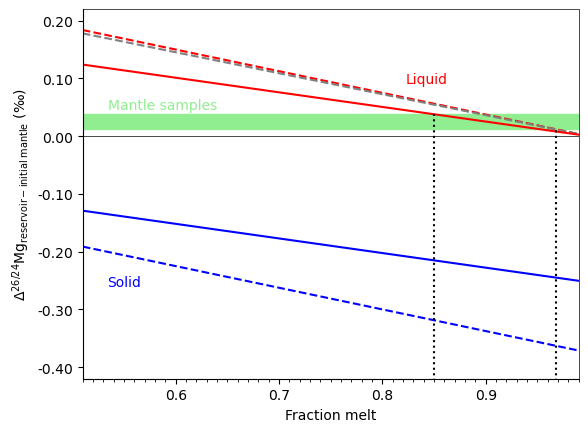

In [5]:
fig, ax = plt.subplots()

ax.plot(liquid_fraction, residual_liquid_Delta_batch_bdm_1000, '--', color='red')
ax.plot(liquid_fraction, residual_liquid_Delta_batch_bulk_1000, '--', color='grey')
ax.plot(liquid_fraction, residual_liquid_Delta_batch_bdm_2500, '-', color='red')
ax.plot(liquid_fraction, cumulate_Delta_batch_bdm_1000, '--', color='blue')
ax.plot(liquid_fraction, cumulate_Delta_batch_bdm_2500, '-', color='blue')

ax.set_xlabel('Fraction melt')
ax.set_ylabel(r"$\Delta^{26/24}$Mg$_{\mathrm{reservoir}-\mathrm{initial\ mantle}}$ (" + u'\u2030' + ")")

ax.set_ylim(top=0.22, bottom=-0.42)
ax.set_xlim(left=0.51, right=0.99)
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_major_formatter('{x:.2f}')

# Add box for condrite offset
# Tim's spreadsheet ax.axhspan(0.01516, 0.03636, color='lightgreen', zorder=1)
# Remco
ax.axhspan(0.012, 0.038, color='lightgreen', zorder=1)

# Play with the borders
#ax.spines['bottom'].set_position('zero')
ax.axhline(0.0, color='k', lw=0.5)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(0.5)

ax.text(0.05, 0.25, 'Solid', color='blue', transform=ax.transAxes)
ax.text(0.65, 0.80, 'Liquid', color='red', transform=ax.transAxes)
ax.text(0.05, 0.73, 'Mantle samples', color='lightgreen', transform=ax.transAxes)
ax.vlines(0.85, -0.5, 0.038, color='k', ls=':')
ax.vlines(0.968, -0.5, 0.012, color='k', ls=':')

plt.show()

In [6]:
print("Minimum Bdm crystalisation fraction to match enstatite chondrites is")
print(f"{1.0 - liquid_fraction[np.logical_and(residual_liquid_Delta_batch_bdm_1000 > 0.012, residual_liquid_Delta_batch_bdm_2500 < 0.038)].max():.3f}")
print("Maximum melt fraction to match enstatite chondrites is")
print(f"{liquid_fraction[np.logical_and(residual_liquid_Delta_batch_bdm_1000 > 0.012, residual_liquid_Delta_batch_bdm_2500 < 0.038)].max():.3f}")

Minimum Bdm crystalisation fraction to match enstatite chondrites is
0.032
Maximum melt fraction to match enstatite chondrites is
0.968


In [7]:
print("Maximum Bdm crystalisation fraction to match enstatite chondrites is")
print(f"{1.0 - liquid_fraction[np.logical_and(residual_liquid_Delta_batch_bdm_1000 > 0.012, residual_liquid_Delta_batch_bdm_2500 < 0.038)].min():.3f}")
print("Maximum melt fraction to match enstatite chondrites is")
print(f"{liquid_fraction[np.logical_and(residual_liquid_Delta_batch_bdm_1000 > 0.012, residual_liquid_Delta_batch_bdm_2500 < 0.038)].min():.3f}")

Maximum Bdm crystalisation fraction to match enstatite chondrites is
0.150
Maximum melt fraction to match enstatite chondrites is
0.850
